In [1]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics as mts
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [4]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

Посмотрим на данные:

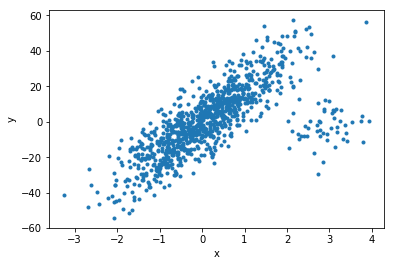

In [7]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [8]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [9]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [10]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

print('\n\nМои метрики:')
print("MAE:", mts.mae(y_test, y_hat))
print("MSE:", mts.mse(y_test, y_hat))
print("R^2 score:", mts.r2_score(y_test, y_hat))

MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Мои метрики:
MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.5121211941029896


Для этой выборки не работает правило сложения дисперсий, поэтому R^2 не совпадают

Посмотрим на веса обученной модели:

In [11]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073639


Визуализируем:

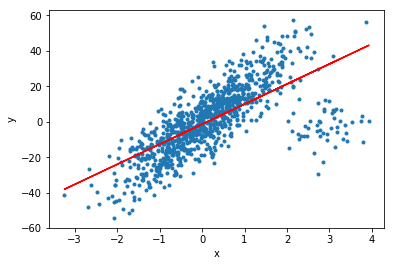

In [12]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [13]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [29]:
lr = MyLinearRegression(0.01)

lr.fit(X_train, y_train, 1000)

LinearRegression(learning_rate=0.01, regularization=None, alpha=0.5)

In [30]:
print(lr.coef_)
print(lr.intercept_)

[11.32509194]
-1.3509413755026098


In [20]:
y_hat = lr.predict(X_test)

In [21]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

print('\n\nМои метрики:')
print("MAE:", mts.mae(y_test, y_hat))
print("MSE:", mts.mse(y_test, y_hat))
print("R^2 score:", mts.r2_score(y_test, y_hat))

MAE: 9.94038932368151
MSE: 173.1932067450779
R^2 score: 0.4726339499929211


Мои метрики:
MAE: 9.94038932368151
MSE: 173.1932067450779
R^2 score: 0.5119284899164369


Значения метрики r2 не совпадают со значениями метрики r2 из sklearn т.к. не выполняется правило сложения дисперсий

In [22]:
res = {}
learning_rates = np.power(10., np.arange(-5, 0))
alphas = np.power(10., np.arange(-6, 6))
regs = [None, 'L1', 'L2']

for learning_rate in learning_rates:
    for reg in regs:
        if reg is None:
            lr = MyLinearRegression(lambda_coef=learning_rate)
            lr.fit(X_train, y_train, iterations=10000)
            y_hat = lr.predict(X_test)
            res[(learning_rate, 'None', 'ND')] = {'My MAE': mts.mae(y_test, y_hat), 
                                                  'My MSE': mts.mse(y_test, y_hat), 
                                                  'My R2': mts.r2_score(y_test, y_hat),
                                                  'sklearn MAE': mean_absolute_error(y_test, y_hat),
                                                  'sklearn MSE': mean_squared_error(y_test, y_hat),
                                                  'sklearn R2': r2_score(y_test, y_hat)}
            continue
        for alpha in alphas:
            lr = MyLinearRegression(lambda_coef=learning_rate, 
                                    regulatization=reg, 
                                    alpha=alpha)
            lr.fit(X_train, y_train, iterations=10000)
            try:
                y_hat = lr.predict(X_test)
                res[(learning_rate, reg, alpha)] = {'My MAE': mts.mae(y_test, y_hat), 
                                                    'My MSE': mts.mse(y_test, y_hat), 
                                                    'My R2': mts.r2_score(y_test, y_hat),
                                                    'sklearn MAE': mean_absolute_error(y_test, y_hat),
                                                    'sklearn MSE': mean_squared_error(y_test, y_hat),
                                                    'sklearn R2': r2_score(y_test, y_hat)}
            except ValueError:
                continue

C:\Users\user\AppliedPythonCourse\AppliedPythonAtom\homeworks\homework_06_ml\linear_regression.py:50: RuntimeWarning: invalid value encountered in double_scalars
  if it and abs(cost_history[it] - cost_history[it-1]) < eps:
C:\Users\user\AppliedPythonCourse\AppliedPythonAtom\homeworks\homework_06_ml\linear_regression.py:42: RuntimeWarning: overflow encountered in multiply
  add = self.alpha * self.__w
C:\Users\user\AppliedPythonCourse\AppliedPythonAtom\homeworks\homework_06_ml\linear_regression.py:48: RuntimeWarning: invalid value encountered in subtract
  (prediction - y_train)) + add)
C:\Users\user\AppliedPythonCourse\AppliedPythonAtom\homeworks\homework_06_ml\linear_regression.py:50: RuntimeWarning: invalid value encountered in double_scalars
  if it and abs(cost_history[it] - cost_history[it-1]) < eps:
C:\Users\user\AppliedPythonCourse\AppliedPythonAtom\homeworks\homework_06_ml\linear_regression.py:42: RuntimeWarning: overflow encountered in multiply
  add = self.alpha * self.__w
C

In [23]:
min(res.items(), key=lambda x: x[1]['My MAE'])

((0.1, 'L2', 1e-05),
 {'My MAE': 9.940359706617313,
  'My MSE': 173.19308351419323,
  'My R2': 0.5120813129213518,
  'sklearn MAE': 9.940359706617313,
  'sklearn MSE': 173.19308351419323,
  'sklearn R2': 0.47263432522579596})

In [24]:
min(res.items(), key=lambda x: x[1]['My MSE'])

((0.1, 'L1', 1000.0),
 {'My MAE': 10.053295892473344,
  'My MSE': 172.99271453548758,
  'My R2': 0.4621382979794854,
  'sklearn MAE': 10.053295892473344,
  'sklearn MSE': 172.99271453548752,
  'sklearn R2': 0.47324444036154434})

In [25]:
max(res.items(), key=lambda x: x[1]['My R2'] if 0 <= x[1]['My R2'] <= 1 else 0)

((0.1, 'L1', 0.001),
 {'My MAE': 9.940359944358972,
  'My MSE': 173.19306799475913,
  'My R2': 0.5120878719453938,
  'sklearn MAE': 9.940359944358972,
  'sklearn MSE': 173.19306799475916,
  'sklearn R2': 0.4726343724818217})

In [26]:
max(res.items(), key=lambda x: x[1]['sklearn R2'] if 0 <= x[1]['sklearn R2'] <= 1 else 0)

((0.1, 'L1', 1000.0),
 {'My MAE': 10.053295892473344,
  'My MSE': 172.99271453548758,
  'My R2': 0.4621382979794854,
  'sklearn MAE': 10.053295892473344,
  'sklearn MSE': 172.99271453548752,
  'sklearn R2': 0.47324444036154434})

Возьмем модели с максимальными значениями r2

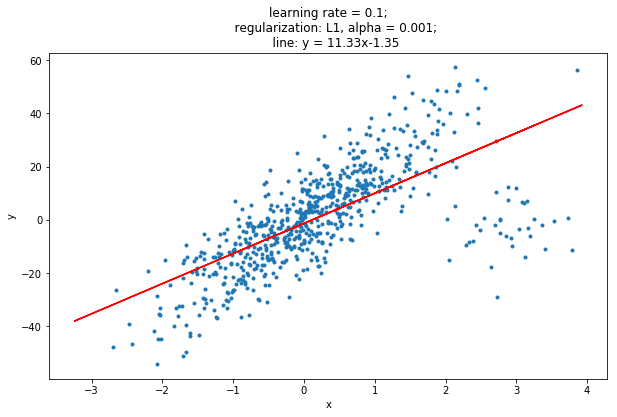

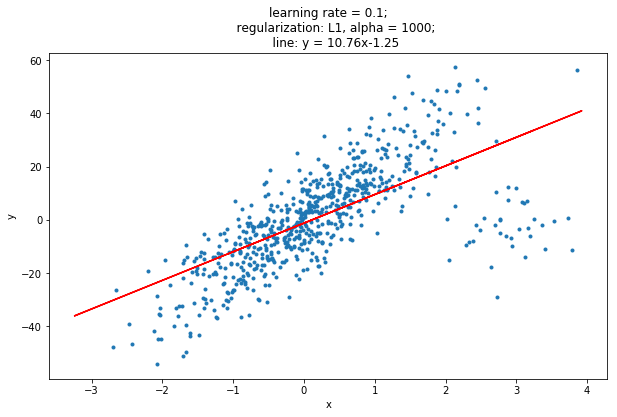

In [31]:
params = ((0.1, 'L1', 0.001),
          (0.1, 'L1', 1000))
for learning_rate, reg, alpha in params:
    lr = MyLinearRegression(lambda_coef=learning_rate, 
                            regulatization=reg, 
                            alpha=alpha)
    lr.fit(X_train, y_train)
    plt.figure(figsize=(10, 6))
    plt.plot(X_train, y_train, ".");
    plt.plot(X, X * lr.coef_[0] + lr.intercept_, "r")
    plt.xlabel("x");
    plt.ylabel("y");
    plt.title(f'''learning rate = {learning_rate};
    regularization: {reg}, alpha = {alpha};
    line: y = {lr.coef_[0]:.2f}x{lr.intercept_:.2f}''')

